# Logistic Regression

* used for classification problems

The results are probabilities!

Results in a linear decision boundary

[`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [52]:
%matplotlib inline

In [53]:
from sklearn.datasets import load_iris
iris = load_iris()

target_names = iris.target_names
X, y = iris.data, iris.target
y = iris.target_names[y]


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Predicting probabilities
# Note: The default threshold is 0.5

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
print(y_score)

pred_probs = classifier.predict_proba(X[:2, :])
print(pred_probs)



[[4.10004664e-03 8.12349946e-01 1.83550008e-01]
 [9.42030963e-01 5.79684574e-02 5.79942441e-07]
 [1.58692343e-08 2.09520559e-03 9.97904779e-01]
 [6.82392519e-03 7.73249206e-01 2.19926869e-01]
 [1.59502399e-03 7.51374805e-01 2.47030171e-01]
 [9.50088852e-01 4.99106893e-02 4.58712370e-07]
 [7.77952517e-02 9.04146828e-01 1.80579208e-02]
 [1.79955265e-04 1.47476919e-01 8.52343125e-01]
 [2.42251225e-03 7.80606718e-01 2.16970770e-01]
 [2.89982678e-02 9.40819061e-01 3.01826709e-02]
 [4.73586199e-04 2.25330345e-01 7.74196069e-01]
 [9.62718698e-01 3.72811180e-02 1.84220206e-07]
 [9.69201236e-01 3.07986678e-02 9.65981244e-08]
 [9.56039494e-01 4.39602410e-02 2.65483627e-07]
 [9.76544463e-01 2.34553472e-02 1.89560583e-07]
 [4.76715068e-03 6.63381243e-01 3.31851607e-01]
 [9.67028958e-06 2.67305345e-02 9.73259795e-01]
 [2.76844006e-02 9.45166472e-01 2.71491279e-02]
 [8.70107373e-03 8.20113253e-01 1.71185674e-01]
 [1.93815988e-05 4.14571602e-02 9.58523458e-01]
 [9.58728827e-01 4.12707192e-02 4.537479

In [56]:
# Use a ROC - receiver operating characteristic curve to visualize the performance of a binary classifier

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1], pos_label=2)

/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


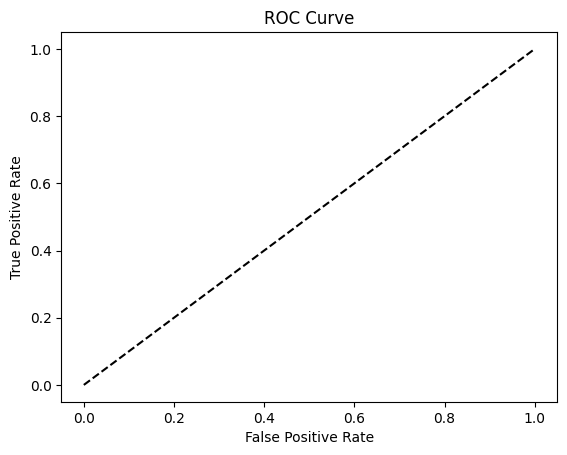

In [57]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [58]:
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs')
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
print(y_score)

pred_probs = classifier.predict_proba(X[:2, :])
print(pred_probs)

[[4.10004664e-03 8.12349946e-01 1.83550008e-01]
 [9.42030963e-01 5.79684574e-02 5.79942441e-07]
 [1.58692343e-08 2.09520559e-03 9.97904779e-01]
 [6.82392519e-03 7.73249206e-01 2.19926869e-01]
 [1.59502399e-03 7.51374805e-01 2.47030171e-01]
 [9.50088852e-01 4.99106893e-02 4.58712370e-07]
 [7.77952517e-02 9.04146828e-01 1.80579208e-02]
 [1.79955265e-04 1.47476919e-01 8.52343125e-01]
 [2.42251225e-03 7.80606718e-01 2.16970770e-01]
 [2.89982678e-02 9.40819061e-01 3.01826709e-02]
 [4.73586199e-04 2.25330345e-01 7.74196069e-01]
 [9.62718698e-01 3.72811180e-02 1.84220206e-07]
 [9.69201236e-01 3.07986678e-02 9.65981244e-08]
 [9.56039494e-01 4.39602410e-02 2.65483627e-07]
 [9.76544463e-01 2.34553472e-02 1.89560583e-07]
 [4.76715068e-03 6.63381243e-01 3.31851607e-01]
 [9.67028958e-06 2.67305345e-02 9.73259795e-01]
 [2.76844006e-02 9.45166472e-01 2.71491279e-02]
 [8.70107373e-03 8.20113253e-01 1.71185674e-01]
 [1.93815988e-05 4.14571602e-02 9.58523458e-01]
 [9.58728827e-01 4.12707192e-02 4.537479

In [59]:
# ROC AUC
from sklearn.metrics import roc_auc_score

classifier = LogisticRegression(multi_class='ovr', solver='lbfgs')
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
print(roc_auc_score(y_test, y_score, multi_class='ovr'))

0.9935897435897436
